In [2]:
# import our libraries
import nltk
from nltk.tokenize import TreebankWordTokenizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import warnings
warnings.filterwarnings("ignore")
# set plot style
sns.set(style='whitegrid')

In [83]:
# import our datasets
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [90]:
#load the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

In [60]:
# view our train data
train_df.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


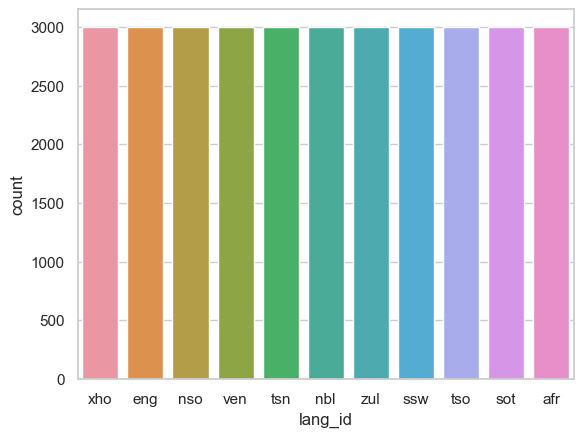

In [61]:
# view the distribution of sentiments in our dataset
sns.countplot(data=train_df, x='lang_id');

In [62]:
# view a description of our dataset
train_df.describe(include='all')

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [63]:
# droping rows with duplicate messages
train_drop = train_df.drop_duplicates(subset='text')
train_drop.shape

(29948, 2)

In [64]:
# view a description of our dataset
train_drop.describe(include='all')

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


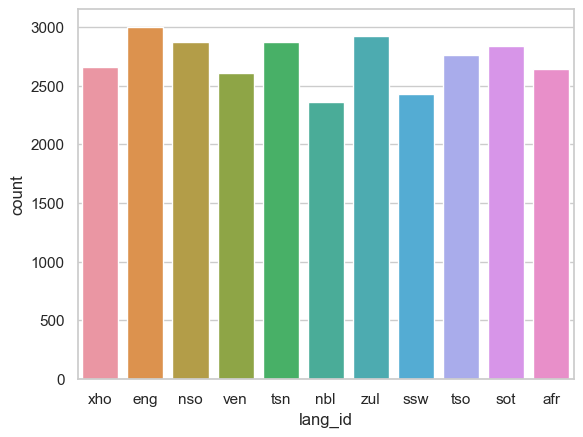

In [65]:
# viewing the distribution of sentiments in our new dataset
sns.countplot(data=train_drop, x='lang_id');

In [66]:
# view the number of tweet per language
train_drop['lang_id'].value_counts()

lang_id
eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: count, dtype: int64

In [67]:
# store a sample tweet in a variable to test our cleaning techniques
sample = train_drop['text'].sample().tolist()[0]
sample

'arali muhaelo wo no ṅwaliswa afrika tshipembe nga fhasi ha mulayo wa vha tea u wana thendelo nthihi fhedzi ya u ṱun ḓa u bva kha vhulanguli ha mutakalo wa phukha kha vha rumele khophi ya u ṅwaliswa nga fhasi ha mulayo wa na khumbelo yavho'

In [68]:
# using regex to remove unncessary text, links and symbols from our data
## preprocessing the sample tweet
# remove hashtag(#) from tweet
sample2 = re.sub('#','',sample)
# remove oldstyle 'RT' from our tweets
sample2 = re.sub(r'^RT[\s]+','',sample2)
# remove hyperlink
sample2 = re.sub(r'https?://[^s\n\r]+','',sample2)
# Remove "��"
sample2 = re.sub("��", "", sample2)
# Remove text starting with "@"
sample2 = re.sub(r"@\w+\s?", "", sample2)
print(sample2)

arali muhaelo wo no ṅwaliswa afrika tshipembe nga fhasi ha mulayo wa vha tea u wana thendelo nthihi fhedzi ya u ṱun ḓa u bva kha vhulanguli ha mutakalo wa phukha kha vha rumele khophi ya u ṅwaliswa nga fhasi ha mulayo wa na khumbelo yavho


In [69]:
# convert our text to lower case
sample2 = sample2.lower()
sample2

'arali muhaelo wo no ṅwaliswa afrika tshipembe nga fhasi ha mulayo wa vha tea u wana thendelo nthihi fhedzi ya u ṱun ḓa u bva kha vhulanguli ha mutakalo wa phukha kha vha rumele khophi ya u ṅwaliswa nga fhasi ha mulayo wa na khumbelo yavho'

In [70]:
# remove punctuations
punctuations = string.punctuation
sample2 = ''.join([word for word in sample2 if word not in punctuations])
sample2

'arali muhaelo wo no ṅwaliswa afrika tshipembe nga fhasi ha mulayo wa vha tea u wana thendelo nthihi fhedzi ya u ṱun ḓa u bva kha vhulanguli ha mutakalo wa phukha kha vha rumele khophi ya u ṅwaliswa nga fhasi ha mulayo wa na khumbelo yavho'

In [71]:
# tokenize our sample
tokenizer = TreebankWordTokenizer()
sample2 = tokenizer.tokenize(sample2)
sample2

['arali',
 'muhaelo',
 'wo',
 'no',
 'ṅwaliswa',
 'afrika',
 'tshipembe',
 'nga',
 'fhasi',
 'ha',
 'mulayo',
 'wa',
 'vha',
 'tea',
 'u',
 'wana',
 'thendelo',
 'nthihi',
 'fhedzi',
 'ya',
 'u',
 'ṱun',
 'ḓa',
 'u',
 'bva',
 'kha',
 'vhulanguli',
 'ha',
 'mutakalo',
 'wa',
 'phukha',
 'kha',
 'vha',
 'rumele',
 'khophi',
 'ya',
 'u',
 'ṅwaliswa',
 'nga',
 'fhasi',
 'ha',
 'mulayo',
 'wa',
 'na',
 'khumbelo',
 'yavho']

In [72]:
# remove stop words from our sample
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
# remove stop words from our sample
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')

sample2 = [word for word in sample2 if word not in stopwords_english]
print(sample2)

['arali', 'muhaelo', 'wo', 'ṅwaliswa', 'afrika', 'tshipembe', 'nga', 'fhasi', 'ha', 'mulayo', 'wa', 'vha', 'tea', 'u', 'wana', 'thendelo', 'nthihi', 'fhedzi', 'ya', 'u', 'ṱun', 'ḓa', 'u', 'bva', 'kha', 'vhulanguli', 'ha', 'mutakalo', 'wa', 'phukha', 'kha', 'vha', 'rumele', 'khophi', 'ya', 'u', 'ṅwaliswa', 'nga', 'fhasi', 'ha', 'mulayo', 'wa', 'na', 'khumbelo', 'yavho']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# stem our sample data
# Initialize WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lem_sample = []

for word in sample2:
    lem_sample.append(lemmatizer.lemmatize(word))
lem_sample

[nltk_data] Downloading package wordnet to /Users/fatima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['arali',
 'muhaelo',
 'wo',
 'ṅwaliswa',
 'afrika',
 'tshipembe',
 'nga',
 'fhasi',
 'ha',
 'mulayo',
 'wa',
 'vha',
 'tea',
 'u',
 'wana',
 'thendelo',
 'nthihi',
 'fhedzi',
 'ya',
 'u',
 'ṱun',
 'ḓa',
 'u',
 'bva',
 'kha',
 'vhulanguli',
 'ha',
 'mutakalo',
 'wa',
 'phukha',
 'kha',
 'vha',
 'rumele',
 'khophi',
 'ya',
 'u',
 'ṅwaliswa',
 'nga',
 'fhasi',
 'ha',
 'mulayo',
 'wa',
 'na',
 'khumbelo',
 'yavho']

In [76]:
# define a function to handle the preprocessing
def preprocess(message):
    import string
    import nltk
    import re
    from nltk.tokenize import TreebankWordTokenizer
    from nltk.stem import WordNetLemmatizer
    punctuations = string.punctuation
    from nltk.corpus import stopwords
    stopwords_english = stopwords.words('english')
    # remove hashtag(#) from tweet
    message = re.sub('#','',message)
    # remove oldstyle 'RT' from our tweets
    message = re.sub(r'^RT[\s]+','',message)
    # remove hyperlink
    message = re.sub(r'https?://[^s\n\r]+','',message)
    # Remove "��"
    message = re.sub("��", "",message)
    # Remove text starting with "@"
    message = re.sub(r"@\w+\s?", "", message)
    # Remove newline followed by any character/digit
    message = re.sub(r"\n.", "", message)
    # convert our text to lower case
    message = message.lower()
    # remove punctuations
    message = ''.join([word for word in message if word not in punctuations])
    # tokenize
    tokenizer = TreebankWordTokenizer()
    message = tokenizer.tokenize(message)
    # remove stop words
    message = [word for word in message if word not in stopwords_english]

    # lemmatize text
    lemmatizer = WordNetLemmatizer()
    lem_message = []

    for word in message:
        lem_message.append(lemmatizer.lemmatize(word))

    return lem_message

In [77]:
# test our function
sample2 = train_drop['text'].sample().tolist()[0]
preprocess(sample2)

['mutholiwa',
 'u',
 'shumisana',
 'zwavhudi',
 'lwa',
 'tshiphurofeshenala',
 'nahone',
 'nga',
 'u',
 'sa',
 'khethulula',
 'na',
 'vhatholiwa',
 'ngae',
 'hu',
 'sa',
 'sedzwi',
 'mbeu',
 'murafho',
 'muvhala',
 'murole',
 'vhuholefhali',
 'vhurereli',
 'dzangano',
 'la',
 'polotiki',
 'u',
 'thetshelesa',
 'muthu',
 'wa',
 'nga',
 'ngomu',
 'lutendo',
 'mvelele',
 'na',
 'luambo']

In [78]:
# add a new column to our database containing preprocessed text
train_drop.loc[:,'preprocessed'] = train_drop['text'].apply(preprocess)

In [79]:
train_drop.head()

,lang_id,text,preprocessed
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulu-natal department of tr...,"[province, kwazulunatal, department, transport..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[netefatša, gore, ba, file, dilo, ka, moka, tš..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [82]:
# create a dictionary to map sentiment codes to their classes
text_language_mapping = {
    "Hello": "English",
    "Dumela": "Northern Sotho",
    "Molo": "Xhosa",
    "Avuxeni": "Tsonga",
    "Sanibonani": "Zulu",
    "Thobela": "Sepedi",
    "Abusheni": "Venda",
    "Lotjhani": "Swazi",
    "Hallo": "Afrikaans",
    # Add more mappings as needed
}

# Accessing the dictionary
print(text_language_mapping["Hello"])  # Output: English
print(text_language_mapping["Molo"])  # Output: Xhosa

English
Xhosa


In [87]:
 # Assume you have loaded language data into a variable called 'language_data'

train_df = {}

for text, language in train_df.items():
    train_df[text] = language




In [89]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from comet_ml import Experiment
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger("comet_ml").setLevel(logging.CRITICAL)

In [92]:
# define a function to handle our training and evaluation
def train_evaluate(model, X, y):
    from comet_ml import Experiment
    experiment = Experiment(
      api_key = "iqazL08SbQfg0MqWe4Jv1zo3p",
      project_name = "sentiment-analysis-climate-change",
      workspace="manlikesolomon"
    )

    # split out predictors and target into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

    # fit our model
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1 = f1_score(y_test, pred,average='weighted')
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    accuracy = accuracy_score(y_test, pred)

    print('Accuracy: ', accuracy)
    print('f1_score: ', f1)
    print('Recall: ', recall)
    print('Precision: ', precision)

    metrics = {'Accuracy': accuracy, 'Precision':precision, 'Recall':recall, 'f1':f1}
    params = model.get_params()
    # log parameters
    experiment.log_parameters(params)
    experiment.log_metrics(metrics)
    experiment.log_confusion_matrix(y_true=y_test, y_predicted=pred)
    experiment.end()
    return model, f1, precision, recall, accuracy

NameError: name 'MultinomialNB' is not defined